In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Visualize the data

In [16]:
data = np.loadtxt("ex1data1.txt", comments="#", delimiter=",", unpack=False)
X = data[:, 0].reshape(-1,1)
Y = data[:, 1].reshape(-1,1)

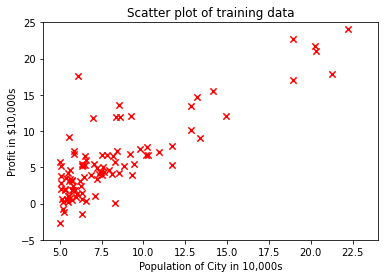

In [17]:
plt.scatter(X, Y, marker='x', color='red', s=40)
plt.axis([4, 24, -5, 25])
plt.title("Scatter plot of training data")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

## Gradient descent

### compute the cost function

In [18]:
def computeCost(X, y, theta):
    m = len(y)
    h = np.dot(X,theta)
    return 1/(2*m) * np.sum((h-y) ** 2)

In [19]:
theta_test1 = np.zeros((2, 1))
col_ones = np.ones(len(X)).reshape(-1,1)
X_with_ones = np.concatenate((col_ones, X), axis=1)
print(computeCost(X_with_ones, Y, theta_test1)) 

32.072733877455676


In [21]:
theta_test2 = np.array([[-1],
                   [2]])
print(computeCost(X_with_ones, Y, theta_test2)) 

54.24245508201238


### Gradient descent algorithm: find the minimum of the cost function J

In [23]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    theta_0 = theta[0][0]
    theta_1 = theta[1][0]

    for i in range(num_iters):
        h = np.dot(X, [[theta_0],
                       [theta_1]])
        theta_0 = theta_0 - alpha / m * np.sum(np.vdot((h - y), X[:, 0]))
        theta_1 = theta_1 - alpha / m * np.sum(np.vdot((h - y), X[:, 1]))

        J_history[i] = computeCost(X, y, [[theta_0], [theta_1]])

    return [[theta_0],
            [theta_1]], J_history

In [25]:
Theta, _ = gradientDescent(X_with_ones, Y, theta_test1, 0.01, 1500)
print(Theta)

[[-3.63029143940436], [1.166362350335582]]


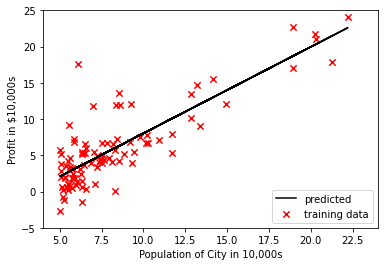

In [75]:
y_pred = np.dot(X_with_ones, Theta)

plt.scatter(X, Y, marker='x', color='red', s=40, label='training data')
plt.plot(X, y_pred, color='black', label='predicted')
plt.legend(loc=4)
plt.axis([4, 24, -5, 25])
# plt.title("Scatter plot of training data")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

## Visualize the cost function

In [78]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]],
                      [theta1_vals[j]]])
        J_vals[i, j] = computeCost(X_with_ones, Y, t)

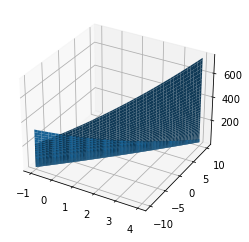

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta1_vals, theta0_vals, J_vals.T)

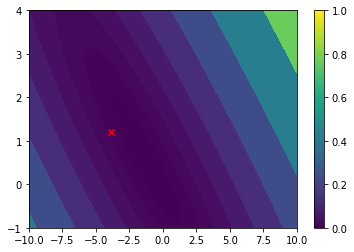

In [80]:
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contourf(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20), extend='both')
plt.scatter(Theta[0], Theta[1], marker='x', color='red')
plt.colorbar()
# plt.axis('scaled')
plt.show()

## Least square fit

In [42]:
from typing import List
from typing import Tuple

In [44]:
Vector = List[float]


def predict(theta0: float, theta1: float, x_i: float) -> float:
    return theta0 + theta1 * x_i


def mean(values: List[float]) -> float:
    return sum(values) / len(values)


def de_mean(v: Vector) -> Vector:
    v_bar = mean(v)
    return [v_i - v_bar for v_i in v]


def dot(v: Vector, w: Vector) -> float:
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


def sum_of_square(v: Vector) -> float:
    return dot(v, v)


def variance(v: Vector) -> float:
    n = len(v)
    deviation = de_mean(v)
    return sum_of_square(deviation) / (n - 1)


def standard_deviation(v: Vector) -> float:
    return math.sqrt(variance(v))


def covariance(X: Vector, h_X: Vector) -> float:
    assert len(X) == len(h_X)
    return dot(de_mean(X), de_mean(h_X)) / (len(X) - 1)


def correlation(xs: Vector, ys: Vector) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)

    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0


def least_sq_fit(X: Vector, h_X: Vector) -> Tuple[float, float]:
    theta1 = correlation(X, h_X) * standard_deviation(h_X) / standard_deviation(X)
    theta0 = mean(h_X) - theta1 * mean(X)
    return theta0, theta1

In [45]:
theta0, theta1 = least_sq_fit(data1_xs, data1_ys)
print(theta0, theta1)

-3.8957808783118635 1.1930336441895941


## Use scikit-learn

In [46]:
from sklearn import linear_model

In [50]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)
y_pred = reg.predict(X)

print(reg.intercept_, reg.coef_)

[-3.89578088] [[1.19303364]]


## Convergence of the gradient descent algorithm

In [51]:
Theta, _ = gradientDescent(X_with_ones, Y, theta_test1, 0.01, 3000)
print(Theta)

[[-3.8780511750501705], [1.1912525031860843]]


In [62]:
Theta, _ = gradientDescent(X_with_ones, Y, theta_test1, 0.01, 6000)
print(Theta)

[[-3.8957018086463466], [1.193025700784039]]


In [61]:
Theta, _ = gradientDescent(X_with_ones, Y, theta_test1, 0.01, 9000)
print(Theta)

[[-3.895780525682601], [1.1930336087641602]]


In [54]:
Theta, _ = gradientDescent(X_with_ones, Y, theta_test1, 0.02, 3000)
print(Theta)

[[-3.895702578437695], [1.1930257781179299]]


In [63]:
Theta, _ = gradientDescent(X_with_ones, Y, theta_test1, 0.02, 5000)
print(Theta)

[[-3.8957808212069938], [1.193033638452791]]


In [81]:
Theta, _ = gradientDescent(X_with_ones, Y, theta_test1, 0.03, 3000)
print(Theta)

[[nan], [nan]]


/Users/zhiwei/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-18-c984414fa0d2>:4: RuntimeWarning: overflow encountered in square
  return 1/(2*m) * np.sum((h-y) ** 2)
<ipython-input-23-633c2f7321a8>:12: RuntimeWarning: invalid value encountered in double_scalars
  theta_1 = theta_1 - alpha / m * np.sum(np.vdot((h - y), X[:, 1]))
